# **Universidade Presbiteriana Mackenzie**

Trabalho de Conclusão da Disciplina

Machine Learning Aplicado: HR Analytics Challenge

*   Gustavo de Paula de Sousa - 10742688



In [ ]:
import shap
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#-------------------------------------------------------------

from sklearn.metrics import f1_score, make_scorer, recall_score, precision_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.0 Leitura e Tratamento Inicial**

 Nesta etapa inicial, realizamos o pré-processamento dos dados com foco em organização e preparação para a análise. Primeiramente, renomeamos todas as colunas do dataset original para o padrão em português brasileiro, com o objetivo de facilitar a leitura e interpretação ao longo do projeto. Em seguida, analisamos a estrutura das variáveis, identificando os tipos de dados presentes, bem como possíveis categorias que precisariam ser traduzidas.

 Como o dataset original possuía apenas 1.470 registros, realizamos uma extrapolação controlada, replicando os dados e aplicando pequenas variações em colunas numéricas para simular uma base mais realista com 1 milhão de funcionários, conforme solicitado no enunciado do trabalho. Isso nos permitiu manter a distribuição geral dos dados, ao mesmo tempo em que aumentamos o volume para comportar análises mais robustas e treinar modelos preditivos em escala.


In [ ]:
df = pl.read_csv(r'/content/drive/MyDrive/projeto_mackenzie_cd/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
display(df)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
i64,str,str,i64,str,i64,i64,str,i64,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
41,"""Yes""","""Travel_Rarely""",1102,"""Sales""",1,2,"""Life Sciences""",1,1,2,"""Female""",94,3,2,"""Sales Executive""",4,"""Single""",5993,19479,8,"""Y""","""Yes""",11,3,1,80,0,8,0,1,6,4,0,5
49,"""No""","""Travel_Frequently""",279,"""Research & Development""",8,1,"""Life Sciences""",1,2,3,"""Male""",61,2,2,"""Research Scientist""",2,"""Married""",5130,24907,1,"""Y""","""No""",23,4,4,80,1,10,3,3,10,7,1,7
37,"""Yes""","""Travel_Rarely""",1373,"""Research & Development""",2,2,"""Other""",1,4,4,"""Male""",92,2,1,"""Laboratory Technician""",3,"""Single""",2090,2396,6,"""Y""","""Yes""",15,3,2,80,0,7,3,3,0,0,0,0
33,"""No""","""Travel_Frequently""",1392,"""Research & Development""",3,4,"""Life Sciences""",1,5,4,"""Female""",56,3,1,"""Research Scientist""",3,"""Married""",2909,23159,1,"""Y""","""Yes""",11,3,3,80,0,8,3,3,8,7,3,0
27,"""No""","""Travel_Rarely""",591,"""Research & Development""",2,1,"""Medical""",1,7,1,"""Male""",40,3,1,"""Laboratory Technician""",2,"""Married""",3468,16632,9,"""Y""","""No""",12,3,4,80,1,6,3,3,2,2,2,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
36,"""No""","""Travel_Frequently""",884,"""Research & Development""",23,2,"""Medical""",1,2061,3,"""Male""",41,4,2,"""Laboratory Technician""",4,"""Married""",2571,12290,4,"""Y""","""No""",17,3,3,80,1,17,3,3,5,2,0,3
39,"""No""","""Travel_Rarely""",613,"""Research & Development""",6,1,"""Medical""",1,2062,4,"""Male""",42,2,3,"""Healthcare Representative""",1,"""Married""",9991,21457,4,"""Y""","""No""",15,3,1,80,1,9,5,3,7,7,1,7
27,"""No""","""Travel_Rarely""",155,"""Research & Development""",4,3,"""Life Sciences""",1,2064,2,"""Male""",87,4,2,"""Manufacturing Director""",2,"""Married""",6142,5174,1,"""Y""","""Yes""",20,4,2,80,1,6,0,3,6,2,0,3


In [ ]:
ajuste_colunas = {
    "Age": "Idade",
    "Attrition": "Desligamento",
    "BusinessTravel": "Viagem_Negocios",
    "DailyRate": "Salario_Diario",
    "Department": "Departamento",
    "DistanceFromHome": "Distancia_Casa",
    "Education": "Educacao",
    "EducationField": "Area_Educacao",
    "EmployeeCount": "Qtd_Funcionarios",
    "EmployeeNumber": "Numero_Funcionario",
    "EnvironmentSatisfaction": "Satisfacao_Ambiente",
    "Gender": "Genero",
    "HourlyRate": "Salario_Hora",
    "JobInvolvement": "Envolvimento_Trabalho",
    "JobLevel": "Nivel_Cargo",
    "JobRole": "Funcao",
    "JobSatisfaction": "Satisfacao_Trabalho",
    "MaritalStatus": "Estado_Civil",
    "MonthlyIncome": "Salario_Mensal",
    "MonthlyRate": "Taxa_Mensal",
    "NumCompaniesWorked": "Qtd_Empresas_Anteriores",
    "Over18": "Maior_de_Idade",
    "OverTime": "Hora_Extra",
    "PercentSalaryHike": "Aumento_Percentual_Salario",
    "PerformanceRating": "Avaliacao_Desempenho",
    "RelationshipSatisfaction": "Satisfacao_Relacionamento",
    "StandardHours": "Horas_Padrao",
    "StockOptionLevel": "Nivel_Acao_Empresa",
    "TotalWorkingYears": "Total_Anos_Trabalho",
    "TrainingTimesLastYear": "Treinamentos_Ultimo_Ano",
    "WorkLifeBalance": "Equilibrio_Vida_Trabalho",
    "YearsAtCompany": "Anos_Empresa",
    "YearsInCurrentRole": "Anos_Cargo_Atual",
    "YearsSinceLastPromotion": "Anos_Desde_Ultima_Promocao",
    "YearsWithCurrManager": "Anos_Mesmo_Gestor"
}

In [ ]:
colunas_a_traduzir = ['Estado_Civil','Genero','Funcao','Area_Educacao','Departamento','Funcao','Funcao','Area_Educacao','Genero','Funcao','Funcao','Area_Educacao','Estado_Civil','Area_Educacao','Hora_Extra','Desligamento','Viagem_Negocios','Area_Educacao','Departamento','Funcao','Funcao','Departamento','Funcao','Funcao','Estado_Civil','Area_Educacao','Viagem_Negocios','Viagem_Negocios','Maior_de_Idade','Hora_Extra','Desligamento']

In [ ]:
dados_traduzidos = {
    "Divorced": "Divorciado",
    "Female": "Feminino",
    "Healthcare Representative": "Representante Saúde",
    "Human Resources": "Recursos Humanos",
    "Laboratory Technician": "Técnico de Laboratório",
    "Life Sciences": "Ciências Biológicas",
    "Male": "Masculino",
    "Manager": "Gerente",
    "Manufacturing Director": "Diretor de Produção",
    "Marketing": "Marketing",
    "Married": "Casado",
    "Medical": "Medicina",
    "No": "Não",
    "Non-Travel": "Sem Viagens",
    "Other": "Outro",
    "Research & Development": "Pesquisa e Desenvolvimento",
    "Research Director": "Diretor de Pesquisa",
    "Research Scientist": "Cientista de Pesquisa",
    "Sales": "Vendas",
    "Sales Executive": "Executivo de Vendas",
    "Sales Representative": "Representante de Vendas",
    "Single": "Solteiro",
    "Technical Degree": "Curso Técnico",
    "Travel_Frequently": "Viaja Frequentemente",
    "Travel_Rarely": "Viaja Raramente",
    "Y": "Sim",
    "Yes": "Sim"}

In [ ]:
df = df.rename(ajuste_colunas)

In [ ]:
for coluna in colunas_a_traduzir:
    if coluna in df.columns:
        df = df.with_columns(pl.col(coluna).replace(dados_traduzidos).alias(coluna))

In [ ]:
df.head()

Idade,Desligamento,Viagem_Negocios,Salario_Diario,Departamento,Distancia_Casa,Educacao,Area_Educacao,Qtd_Funcionarios,Numero_Funcionario,Satisfacao_Ambiente,Genero,Salario_Hora,Envolvimento_Trabalho,Nivel_Cargo,Funcao,Satisfacao_Trabalho,Estado_Civil,Salario_Mensal,Taxa_Mensal,Qtd_Empresas_Anteriores,Maior_de_Idade,Hora_Extra,Aumento_Percentual_Salario,Avaliacao_Desempenho,Satisfacao_Relacionamento,Horas_Padrao,Nivel_Acao_Empresa,Total_Anos_Trabalho,Treinamentos_Ultimo_Ano,Equilibrio_Vida_Trabalho,Anos_Empresa,Anos_Cargo_Atual,Anos_Desde_Ultima_Promocao,Anos_Mesmo_Gestor
i64,str,str,i64,str,i64,i64,str,i64,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
41,"""Sim""","""Viaja Raramente""",1102,"""Vendas""",1,2,"""Ciências Biológicas""",1,1,2,"""Feminino""",94,3,2,"""Executivo de Vendas""",4,"""Solteiro""",5993,19479,8,"""Sim""","""Sim""",11,3,1,80,0,8,0,1,6,4,0,5
49,"""Não""","""Viaja Frequentemente""",279,"""Pesquisa e Desenvolvimento""",8,1,"""Ciências Biológicas""",1,2,3,"""Masculino""",61,2,2,"""Cientista de Pesquisa""",2,"""Casado""",5130,24907,1,"""Sim""","""Não""",23,4,4,80,1,10,3,3,10,7,1,7
37,"""Sim""","""Viaja Raramente""",1373,"""Pesquisa e Desenvolvimento""",2,2,"""Outro""",1,4,4,"""Masculino""",92,2,1,"""Técnico de Laboratório""",3,"""Solteiro""",2090,2396,6,"""Sim""","""Sim""",15,3,2,80,0,7,3,3,0,0,0,0
33,"""Não""","""Viaja Frequentemente""",1392,"""Pesquisa e Desenvolvimento""",3,4,"""Ciências Biológicas""",1,5,4,"""Feminino""",56,3,1,"""Cientista de Pesquisa""",3,"""Casado""",2909,23159,1,"""Sim""","""Sim""",11,3,3,80,0,8,3,3,8,7,3,0
27,"""Não""","""Viaja Raramente""",591,"""Pesquisa e Desenvolvimento""",2,1,"""Medicina""",1,7,1,"""Masculino""",40,3,1,"""Técnico de Laboratório""",2,"""Casado""",3468,16632,9,"""Sim""","""Não""",12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
multiplicador = int(1_000_000 / df.shape[0]) + 1

In [ ]:
lista_df = [df.clone() for _ in range(multiplicador)]

In [ ]:
df_expandido = pl.concat(lista_df, how="vertical")

In [ ]:
df_expandido = df_expandido[:1_000_000]

In [ ]:
df_expandido = df_expandido.with_columns(pl.arange(1, df_expandido.height + 1).alias("Numero_Funcionario"))

In [ ]:
display(df_expandido)

Idade,Desligamento,Viagem_Negocios,Salario_Diario,Departamento,Distancia_Casa,Educacao,Area_Educacao,Qtd_Funcionarios,Numero_Funcionario,Satisfacao_Ambiente,Genero,Salario_Hora,Envolvimento_Trabalho,Nivel_Cargo,Funcao,Satisfacao_Trabalho,Estado_Civil,Salario_Mensal,Taxa_Mensal,Qtd_Empresas_Anteriores,Maior_de_Idade,Hora_Extra,Aumento_Percentual_Salario,Avaliacao_Desempenho,Satisfacao_Relacionamento,Horas_Padrao,Nivel_Acao_Empresa,Total_Anos_Trabalho,Treinamentos_Ultimo_Ano,Equilibrio_Vida_Trabalho,Anos_Empresa,Anos_Cargo_Atual,Anos_Desde_Ultima_Promocao,Anos_Mesmo_Gestor
i64,str,str,i64,str,i64,i64,str,i64,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
41,"""Sim""","""Viaja Raramente""",1102,"""Vendas""",1,2,"""Ciências Biológicas""",1,1,2,"""Feminino""",94,3,2,"""Executivo de Vendas""",4,"""Solteiro""",5993,19479,8,"""Sim""","""Sim""",11,3,1,80,0,8,0,1,6,4,0,5
49,"""Não""","""Viaja Frequentemente""",279,"""Pesquisa e Desenvolvimento""",8,1,"""Ciências Biológicas""",1,2,3,"""Masculino""",61,2,2,"""Cientista de Pesquisa""",2,"""Casado""",5130,24907,1,"""Sim""","""Não""",23,4,4,80,1,10,3,3,10,7,1,7
37,"""Sim""","""Viaja Raramente""",1373,"""Pesquisa e Desenvolvimento""",2,2,"""Outro""",1,3,4,"""Masculino""",92,2,1,"""Técnico de Laboratório""",3,"""Solteiro""",2090,2396,6,"""Sim""","""Sim""",15,3,2,80,0,7,3,3,0,0,0,0
33,"""Não""","""Viaja Frequentemente""",1392,"""Pesquisa e Desenvolvimento""",3,4,"""Ciências Biológicas""",1,4,4,"""Feminino""",56,3,1,"""Cientista de Pesquisa""",3,"""Casado""",2909,23159,1,"""Sim""","""Sim""",11,3,3,80,0,8,3,3,8,7,3,0
27,"""Não""","""Viaja Raramente""",591,"""Pesquisa e Desenvolvimento""",2,1,"""Medicina""",1,5,1,"""Masculino""",40,3,1,"""Técnico de Laboratório""",2,"""Casado""",3468,16632,9,"""Sim""","""Não""",12,3,4,80,1,6,3,3,2,2,2,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
43,"""Não""","""Viaja Frequentemente""",313,"""Pesquisa e Desenvolvimento""",21,3,"""Medicina""",1,999996,4,"""Masculino""",61,3,1,"""Técnico de Laboratório""",4,"""Casado""",2258,15238,7,"""Sim""","""Não""",20,4,1,80,1,8,1,3,3,2,1,2
43,"""Não""","""Viaja Raramente""",1473,"""Pesquisa e Desenvolvimento""",8,4,"""Outro""",1,999997,3,"""Feminino""",74,3,2,"""Representante Saúde""",3,"""Divorciado""",4522,2227,4,"""Sim""","""Sim""",14,3,4,80,0,8,3,3,5,2,0,2
25,"""Não""","""Viaja Raramente""",891,"""Vendas""",4,2,"""Ciências Biológicas""",1,999998,2,"""Feminino""",99,2,2,"""Executivo de Vendas""",4,"""Solteiro""",4487,12090,1,"""Sim""","""Sim""",11,3,2,80,0,5,3,3,5,4,1,3


# **2.0 Análise Exploratória**

Nesta seção, realizamos uma análise exploratória completa do dataset com o objetivo de compreender o comportamento das variáveis, identificar padrões relevantes e gerar hipóteses de negócio para a modelagem preditiva.

Inicialmente, foram extraídas estatísticas descritivas das variáveis numéricas (como média, desvio padrão, mínimo, máximo e quartis), o que nos permitiu detectar colunas com baixa variabilidade — como Horas_Padrao e Qtd_Funcionarios — que podem ser descartadas por não contribuírem para o modelo. Também foi possível identificar variáveis numéricas que na prática representam escalas ordinais, como Satisfacao_Trabalho e Envolvimento_Trabalho, que deverão ser tratadas de forma apropriada.

A seguir, analisamos a distribuição da variável-alvo Desligamento e verificamos que se trata de um problema desbalanceado, com aproximadamente 16% de desligamentos. Com base nisso, passamos a investigar possíveis relações entre essa variável e outras do conjunto de dados. Utilizamos análises bivariadas e visualizações (boxplots, histogramas, gráficos de barras e mapas de calor) para avaliar a associação entre o desligamento e atributos como idade, salário, hora extra, distância da residência e satisfação no trabalho.

Foram identificados padrões relevantes, como:

* Funcionários que fazem hora extra têm maior propensão a deixar a empresa.

* A distância entre residência e local de trabalho influencia negativamente na permanência.

* Baixos níveis de satisfação e envolvimento estão associados ao desligamento.

Além disso, verificamos a presença de outliers em variáveis como Salario_Mensal e Anos_Empresa, que, embora legítimos, devem ser tratados com atenção na modelagem. Por fim, confirmamos que não há valores ausentes no dataset, o que simplifica o processo de preparação de dados.

Essa análise exploratória fornece uma base sólida para a próxima etapa do projeto, que envolve a engenharia de atributos e a seleção de variáveis mais relevantes para a previsão do risco de desligamento.

# **2.1 Análise estatística completa das variáveis**

* Selecionamos apenas as features numéricas para fazer uma análise inicial.

* Usamos describe() e transposição para gerar estatísticas completas: média, desvio, quartis, min e max.

* Colunas com variância nula como Qtd_Funcionarios e Horas_Padrao não trazem informação e podem ser descartadas.

* Educacao, Nivel_Cargo, Satisfação (todas as categorias) são variáveis ordinais, e não contínuas.

* As métricas salariais possuem alta dispersão, indicando grande desigualdade interna.

In [ ]:
colunas_numericas = [col for col, dtype in zip(df_expandido.columns, df_expandido.dtypes)
    if dtype in (pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64, pl.Float32, pl.Float64)]

In [ ]:
df_expandido_pd = df_expandido.select(colunas_numericas).to_pandas()
df_expandido_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1000000.0,36.923850,9.132323,18.0,30.00,36.0,43.00,60.0
Salario_Diario,1000000.0,802.499738,403.373025,102.0,465.00,802.0,1157.00,1499.0
Distancia_Casa,1000000.0,9.192358,8.104074,1.0,2.00,7.0,14.00,29.0
Educacao,1000000.0,2.912913,1.023813,1.0,2.00,3.0,4.00,5.0
Qtd_Funcionarios,1000000.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Numero_Funcionario,1000000.0,500000.500000,288675.278933,1.0,250000.75,500000.5,750000.25,1000000.0
Satisfacao_Ambiente,1000000.0,2.721773,1.092694,1.0,2.00,3.0,4.00,4.0
Salario_Hora,1000000.0,65.891295,20.322763,30.0,48.00,66.0,84.00,100.0
Envolvimento_Trabalho,1000000.0,2.729933,0.711307,1.0,2.00,3.0,3.00,4.0
Nivel_Cargo,1000000.0,2.063944,1.106563,1.0,1.00,2.0,3.00,5.0


# **2.2 Identificação de padrões e correlações**

In [ ]:
df_pd = df_expandido.to_pandas()
corr = df_pd.select_dtypes(include="number").corr()

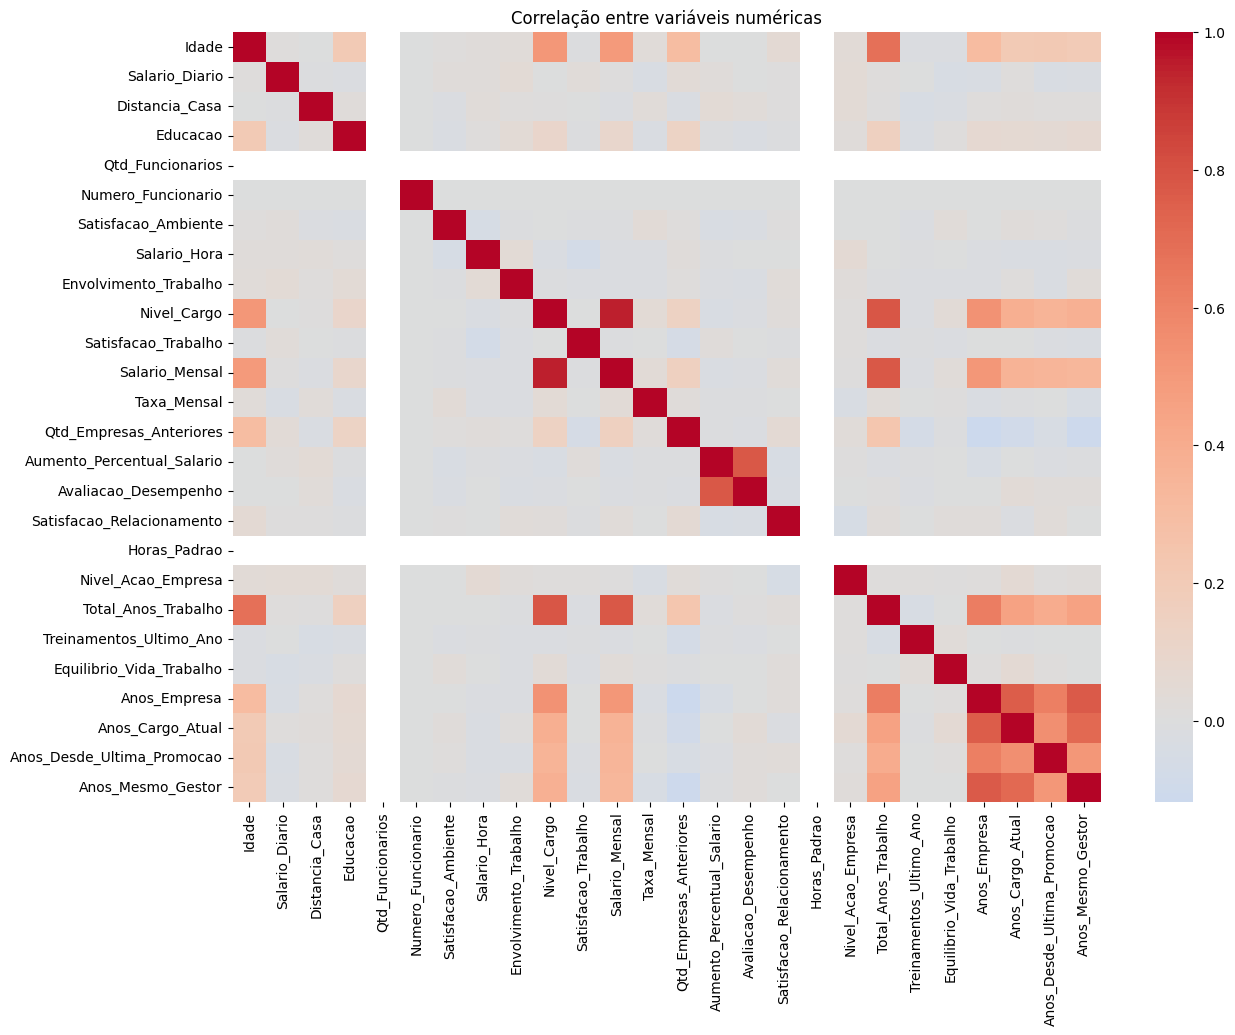

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlação entre variáveis numéricas")
plt.show()

In [ ]:
# Correlação entre variáveis numéricas e 'Desligamento'
df_pd['Desligamento_bin'] = df_pd['Desligamento'].map({'Sim': 1, 'Não': 0})

In [ ]:
# Selecionar apenas colunas numéricas
colunas_numericas = df_pd.select_dtypes(include=["number"]).columns

In [ ]:
# Calcular correlação apenas dessas colunas
cor_target = df_pd[colunas_numericas].corr()["Desligamento_bin"].sort_values(ascending=False)

In [ ]:
# Mostrar as top correlações com a variável alvo
print(cor_target.head(10))

Desligamento_bin              1.000000
Distancia_Casa                0.077930
Qtd_Empresas_Anteriores       0.043487
Taxa_Mensal                   0.015180
Avaliacao_Desempenho          0.002908
Numero_Funcionario           -0.000036
Salario_Hora                 -0.006848
Aumento_Percentual_Salario   -0.013465
Educacao                     -0.031371
Anos_Desde_Ultima_Promocao   -0.033027
Name: Desligamento_bin, dtype: float64


# **2.3  Visualizações criativas e informativas**

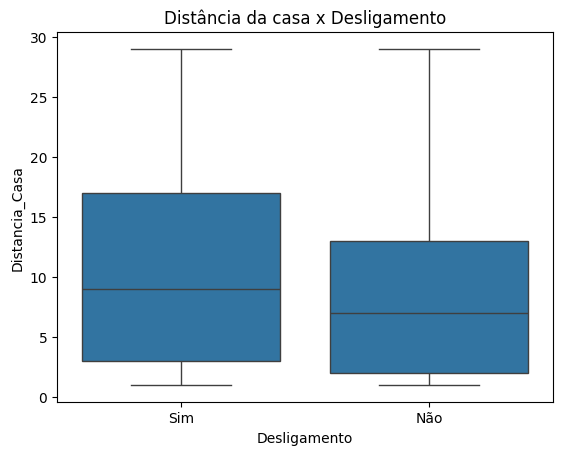

In [ ]:
sns.boxplot(data=df_pd, x="Desligamento", y="Distancia_Casa")
plt.title("Distância da casa x Desligamento")
plt.show()

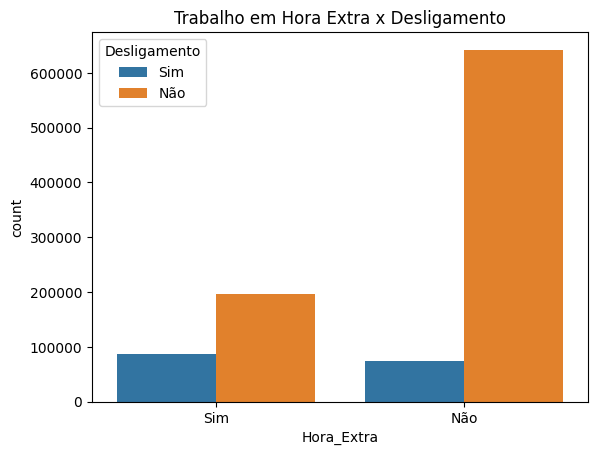

In [ ]:
sns.countplot(data=df_pd, x="Hora_Extra", hue="Desligamento")
plt.title("Trabalho em Hora Extra x Desligamento")
plt.show()

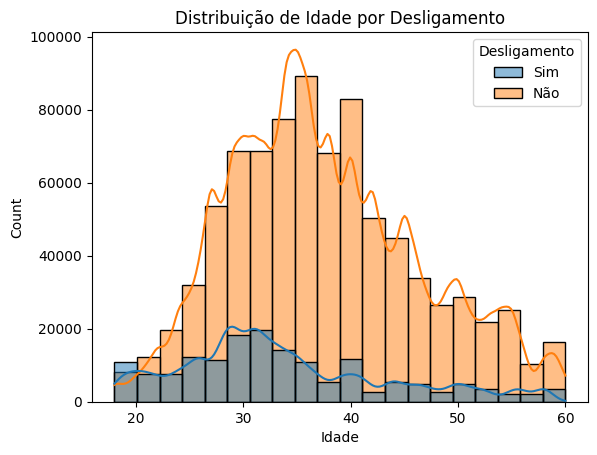

In [ ]:
sns.histplot(data=df_pd, x="Idade", hue="Desligamento", bins=20, kde=True)
plt.title("Distribuição de Idade por Desligamento")
plt.show()

# **2.4 Tratamento de dados faltantes e outliers**

In [ ]:
# Retorna uma linha com os nomes das colunas e a contagem de nulos
nulos = df_expandido.null_count()

In [ ]:
# Transforma em formato longo (melt) para facilitar ordenação
nulos_long = nulos.melt(variable_name="coluna", value_name="nulos").sort("nulos", descending=True)

/tmp/ipython-input-29-214501341.py:2: DeprecationWarning: `DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  nulos_long = nulos.melt(variable_name="coluna", value_name="nulos").sort("nulos", descending=True)


In [ ]:
nulos_long.sort("nulos", descending=True)

coluna,nulos
str,u32
"""Idade""",0
"""Desligamento""",0
"""Viagem_Negocios""",0
"""Salario_Diario""",0
"""Departamento""",0
…,…
"""Equilibrio_Vida_Trabalho""",0
"""Anos_Empresa""",0
"""Anos_Cargo_Atual""",0


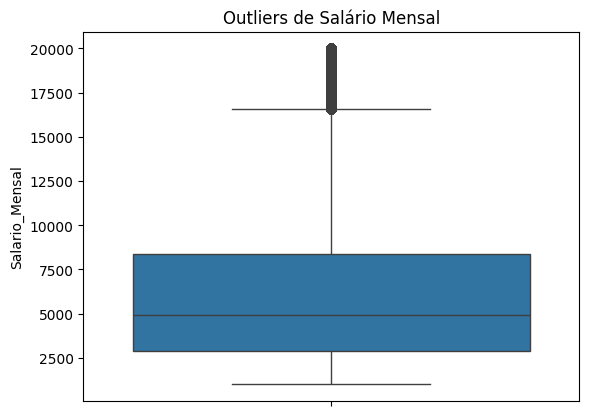

In [ ]:
sns.boxplot(data=df_pd, y="Salario_Mensal")
plt.title("Outliers de Salário Mensal")
plt.show()

# **3.0 Feature Engineering**

**Objetivo**

Criar novas variáveis que aumentem a capacidade preditiva do modelo, com base em hipóteses de negócio e técnicas de transformação de dados.

In [ ]:
df_expandido = df_expandido.with_columns([
((pl.col("Hora_Extra") == "Sim") & (pl.col("Treinamentos_Ultimo_Ano") >= 3)).cast(pl.Int8).alias("Fadiga_Alta"),

((pl.col("Anos_Empresa") >= 5) & (pl.col("Anos_Desde_Ultima_Promocao") >= 4)).cast(pl.Int8).alias("Estagnado"),

((pl.col("Anos_Empresa") <= 1) & (pl.col("Distancia_Casa") > 15)).cast(pl.Int8).alias("Novo_e_Longe"),

((pl.col("Avaliacao_Desempenho") >= 3) & (pl.col("Nivel_Cargo") <= 2)).cast(pl.Int8).alias("Subavaliado"),

((pl.col("Area_Educacao") == "Ciencias Biológicas") &
     (pl.col("Funcao").is_in(["Executivo de Vendas", "Representante de Vendas", "Gerente"]))).cast(pl.Int8).alias("Desalinhado_Educacao_Funcao"),

((pl.col("Anos_Desde_Ultima_Promocao") > 3) & (pl.col("Nivel_Cargo") <= 2)).cast(pl.Int8).alias("Possivel_Promocao_Bloqueada"),

((pl.col("Salario_Mensal") < 3000) & (pl.col("Total_Anos_Trabalho") > 10)).cast(pl.Int8).alias("Desalinhamento_Salario_Experiencia"),

((pl.col("Anos_Empresa") < 2) & (pl.col("Satisfacao_Trabalho") < 2.5)).cast(pl.Int8).alias("Risco_Saida"),

((pl.col("Treinamentos_Ultimo_Ano") > 3) & (pl.col("Hora_Extra") == "Sim") &
     (pl.col("Viagem_Negocios") == "Viaja Frequentemente") &
      (pl.col("Salario_Mensal") < 2500)).cast(pl.Int8).alias("Alta_Exigencia_Baixo_Retorno"),

((pl.col("Anos_Empresa") >= 8) & (pl.col("Satisfacao_Trabalho") < 2.5) &
     (pl.col("Envolvimento_Trabalho") <= 2)).cast(pl.Int8).alias("Alto_Tempo_Baixo_Engajamento")])

In [ ]:
df_expandido.head()

Idade,Desligamento,Viagem_Negocios,Salario_Diario,Departamento,Distancia_Casa,Educacao,Area_Educacao,Qtd_Funcionarios,Numero_Funcionario,Satisfacao_Ambiente,Genero,Salario_Hora,Envolvimento_Trabalho,Nivel_Cargo,Funcao,Satisfacao_Trabalho,Estado_Civil,Salario_Mensal,Taxa_Mensal,Qtd_Empresas_Anteriores,Maior_de_Idade,Hora_Extra,Aumento_Percentual_Salario,Avaliacao_Desempenho,Satisfacao_Relacionamento,Horas_Padrao,Nivel_Acao_Empresa,Total_Anos_Trabalho,Treinamentos_Ultimo_Ano,Equilibrio_Vida_Trabalho,Anos_Empresa,Anos_Cargo_Atual,Anos_Desde_Ultima_Promocao,Anos_Mesmo_Gestor,Fadiga_Alta,Estagnado,Novo_e_Longe,Subavaliado,Desalinhado_Educacao_Funcao,Possivel_Promocao_Bloqueada,Desalinhamento_Salario_Experiencia,Risco_Saida,Alta_Exigencia_Baixo_Retorno,Alto_Tempo_Baixo_Engajamento
i64,str,str,i64,str,i64,i64,str,i64,i64,i64,str,i64,i64,i64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
41,"""Sim""","""Viaja Raramente""",1102,"""Vendas""",1,2,"""Ciências Biológicas""",1,1,2,"""Feminino""",94,3,2,"""Executivo de Vendas""",4,"""Solteiro""",5993,19479,8,"""Sim""","""Sim""",11,3,1,80,0,8,0,1,6,4,0,5,0,0,0,1,0,0,0,0,0,0
49,"""Não""","""Viaja Frequentemente""",279,"""Pesquisa e Desenvolvimento""",8,1,"""Ciências Biológicas""",1,2,3,"""Masculino""",61,2,2,"""Cientista de Pesquisa""",2,"""Casado""",5130,24907,1,"""Sim""","""Não""",23,4,4,80,1,10,3,3,10,7,1,7,0,0,0,1,0,0,0,0,0,1
37,"""Sim""","""Viaja Raramente""",1373,"""Pesquisa e Desenvolvimento""",2,2,"""Outro""",1,3,4,"""Masculino""",92,2,1,"""Técnico de Laboratório""",3,"""Solteiro""",2090,2396,6,"""Sim""","""Sim""",15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0
33,"""Não""","""Viaja Frequentemente""",1392,"""Pesquisa e Desenvolvimento""",3,4,"""Ciências Biológicas""",1,4,4,"""Feminino""",56,3,1,"""Cientista de Pesquisa""",3,"""Casado""",2909,23159,1,"""Sim""","""Sim""",11,3,3,80,0,8,3,3,8,7,3,0,1,0,0,1,0,0,0,0,0,0
27,"""Não""","""Viaja Raramente""",591,"""Pesquisa e Desenvolvimento""",2,1,"""Medicina""",1,5,1,"""Masculino""",40,3,1,"""Técnico de Laboratório""",2,"""Casado""",3468,16632,9,"""Sim""","""Não""",12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,0,0


| Feature                              | Justificativa Técnica                                                                      | Justificativa de Negócio                                                                                        |
| ------------------------------------ | ------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------- |
| `Fadiga_Alta`                        | Combina duas variáveis indicadoras de alta demanda física/mental.                          | Funcionários sobrecarregados tendem a se desligar por exaustão, burnout ou falta de qualidade de vida.          |
| `Estagnado`                          | Considera tempo longo na empresa sem promoção, criando marcador de estagnação.             | Pode indicar desmotivação, sensação de bloqueio na carreira ou falta de reconhecimento.                         |
| `Novo_e_Longe`                       | Junta baixa senioridade com longa distância de deslocamento.                               | Novos funcionários que moram longe tendem a sair mais cedo se não houver vínculo afetivo com a empresa.         |
| `Subavaliado`                        | Alta performance e baixo nível de cargo indicam desalinhamento entre mérito e cargo atual. | Funcionários com performance alta que não são promovidos podem se sentir injustiçados e procurar novas ofertas. |
| `Desalinhado_Educacao_Funcao`        | Detecta casos de incongruência entre área de formação e cargo.                             | Quando há desalinhamento, a pessoa pode estar insatisfeita ou deslocada.                                        |
| `Possivel_Promocao_Bloqueada`        | Tempo médio entre promoções elevado, mas ainda em nível baixo.                             | Indica falta de perspectiva de crescimento — fator clássico de attrition.                                       |
| `Desalinhamento_Salario_Experiencia` | Salário abaixo da média para quem tem muita experiência.                                   | O sentimento de estar "ganhando pouco para o que entrega" é uma das causas mais citadas para pedido de saída.   |
| `Risco_Saida`           | Junta pouca antiguidade com baixa satisfação geral.                                        | Pessoas que não se adaptam logo nos primeiros anos tendem a sair rapidamente.                                   |
| `Alta_Exigencia_Baixo_Retorno`       | Agrupa exigência alta (hora extra, viagens, treinamentos) com salário abaixo do normal.    | Funcionário pode perceber relação custo-benefício ruim, levando ao desejo de sair.                              |
| `Alto_Tempo_Baixo_Engajamento`       | Cruzamento entre tempo de casa e engajamento baixo.                                        | Funcionários "acomodados" com pouco engajamento são riscos invisíveis ao RH — permanecem, mas podem sair.       |


In [ ]:
#Observação, repetimos essa etapa para as novas features
df_pd = df_expandido.to_pandas()

In [ ]:
if "Desligamento_bin" not in df_pd.columns: df_pd["Desligamento_bin"] = df_pd["Desligamento"].map({"Sim": 1, "Não": 0})

In [ ]:
novas_features = [
    "Fadiga_Alta", "Estagnado", "Novo_e_Longe", "Subavaliado",
    "Desalinhado_Educacao_Funcao", "Possivel_Promocao_Bloqueada",
    "Desalinhamento_Salario_Experiencia", "Risco_Saida",
    "Alta_Exigencia_Baixo_Retorno", "Alto_Tempo_Baixo_Engajamento"
]

In [ ]:
correlacoes = df_pd[novas_features + ["Desligamento_bin"]].corr()["Desligamento_bin"].drop("Desligamento_bin").sort_values(ascending=False)

In [ ]:
print(correlacoes)

Novo_e_Longe                          0.172853
Risco_Saida                           0.172197
Fadiga_Alta                           0.118331
Alta_Exigencia_Baixo_Retorno          0.103152
Subavaliado                           0.089295
Alto_Tempo_Baixo_Engajamento          0.015660
Desalinhamento_Salario_Experiencia    0.015613
Possivel_Promocao_Bloqueada          -0.019832
Estagnado                            -0.043668
Desalinhado_Educacao_Funcao                NaN
Name: Desligamento_bin, dtype: float64


In [ ]:
def plot_feature_vs_target(df, feature):
    sns.barplot(data=df, x=feature, y="Desligamento_bin")
    plt.title(f"Probabilidade de Desligamento por {feature}")
    plt.ylabel("Proporção de Desligados")
    plt.xlabel(feature)
    plt.ylim(0, 0.5)
    plt.show()

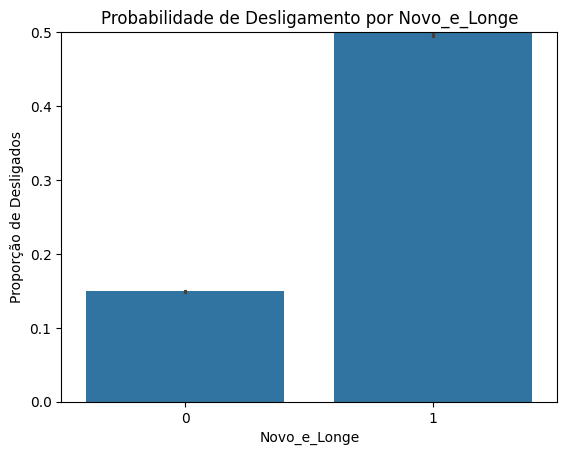

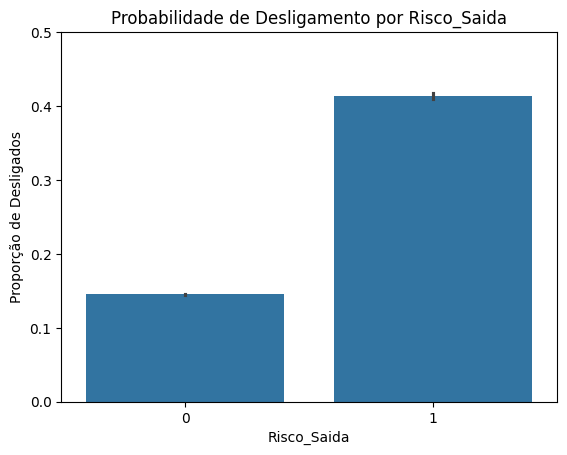

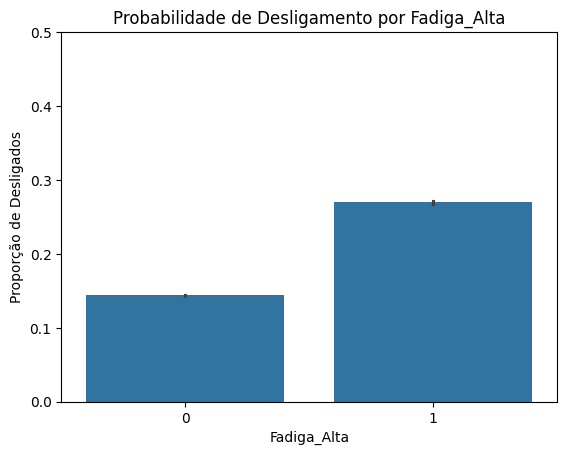

In [ ]:
for feat in ["Novo_e_Longe", "Risco_Saida", "Fadiga_Alta"]:
    plot_feature_vs_target(df_pd, feat)

In [ ]:
X = df_pd[novas_features]
y = df_pd["Desligamento_bin"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [ ]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
importancias = pd.Series(modelo.feature_importances_, index=novas_features).sort_values(ascending=False)
print(importancias)

Risco_Saida                           0.242709
Novo_e_Longe                          0.216848
Fadiga_Alta                           0.174289
Subavaliado                           0.159120
Desalinhamento_Salario_Experiencia    0.058315
Alta_Exigencia_Baixo_Retorno          0.055677
Alto_Tempo_Baixo_Engajamento          0.052995
Estagnado                             0.024639
Possivel_Promocao_Bloqueada           0.015408
Desalinhado_Educacao_Funcao           0.000000
dtype: float64


4.0 Modelos

In [ ]:
X = df_pd[novas_features]
y = df_pd["Desligamento_bin"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
modelo_lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
modelo_lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
modelo_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [ ]:
modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
modelo_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:28:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
df_major = df_train[df_train["Desligamento_bin"] == 0]
df_minor = df_train[df_train["Desligamento_bin"] == 1]

In [ ]:
df_minor_upsampled = resample(df_minor, replace=True, n_samples=len(df_major), random_state=42)

In [ ]:
df_balanced = pd.concat([df_major, df_minor_upsampled])
X_train_bal = df_balanced.drop("Desligamento_bin", axis=1)
y_train_bal = df_balanced["Desligamento_bin"]

In [ ]:
modelo_mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
modelo_mlp.fit(scaler.fit_transform(X_train_bal), y_train_bal)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [ ]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ["balanced"]
}

In [ ]:
param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [scale_pos_weight]  # calculado previamente
}

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": ["balanced"]
}

In [ ]:
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_rf.fit(X_train, y_train)
print("Melhores parâmetros RF:", grid_rf.best_params_)
print("Melhor f1-score RF:", grid_rf.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Melhores parâmetros RF: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhor f1-score RF: 0.4023053455329723


In [ ]:
param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [scale_pos_weight]
}

In [ ]:
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    param_grid=param_grid_xgb,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_xgb.fit(X_train, y_train)
print("Melhores parâmetros XGB:", grid_xgb.best_params_)
print("Melhor f1-score XGB:", grid_xgb.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhores parâmetros XGB: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'scale_pos_weight': np.float64(5.202704379109291), 'subsample': 0.8}
Melhor f1-score XGB: 0.4023053455329723


In [ ]:
melhor_rf = grid_rf.best_estimator_

In [ ]:
melhor_xgb = grid_xgb.best_estimator_

In [ ]:
f1_rf = cross_val_score(melhor_rf, X_train, y_train, cv=5, scoring="f1")
recall_rf = cross_val_score(melhor_rf, X_train, y_train, cv=5, scoring="recall")

In [ ]:
f1_xgb = cross_val_score(melhor_xgb, X_train, y_train, cv=5, scoring="f1")
recall_xgb = cross_val_score(melhor_xgb, X_train, y_train, cv=5, scoring="recall")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
print("Random Forest - F1:", f1_rf.mean(), "±", f1_rf.std())
print("Random Forest - Recall:", recall_rf.mean(), "±", recall_rf.std())

Random Forest - F1: 0.4023072674629214 ± 0.0014010547588330499
Random Forest - Recall: 0.4568114475648516 ± 0.001076262193793281


In [ ]:

print("XGBoost - F1:", f1_xgb.mean(), "±", f1_xgb.std())
print("XGBoost - Recall:", recall_xgb.mean(), "±", recall_xgb.std())

XGBoost - F1: 0.4023072674629214 ± 0.0014010547588330499
XGBoost - Recall: 0.4568114475648516 ± 0.001076262193793281


In [ ]:
estimadores = [
    ("lr", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)),
    ("rf", grid_rf.best_estimator_),
    ("xgb", grid_xgb.best_estimator_)
]

In [ ]:
meta_model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
modelo_stack = StackingClassifier(estimators=estimadores,final_estimator=meta_model,cv=5,n_jobs=-1,passthrough=False)

In [ ]:
modelo_stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=1000,
                                                   random_state=42)),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_roun...
                                              learning_rate=0.01, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1)

In [ ]:
y_pred = modelo_stack.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, digits=3, target_names=["Permaneceu", "Desligado"]))

              precision    recall  f1-score   support

  Permaneceu      0.847     0.995     0.915    251634
   Desligado      0.728     0.067     0.122     48366

    accuracy                          0.846    300000
   macro avg      0.788     0.531     0.519    300000
weighted avg      0.828     0.846     0.787    300000

